<a href="https://colab.research.google.com/github/Antony-gitau/machine_learning_playground/blob/main/playing_with_gpt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I aim to build some practical experience with language models by playing with GPT2.

I will follow some resources online like:
- Andrew Karpathy's youtube tutorial
- hugging face open community implementation
- and the gpt2 repo that contains the opensourced code
- i will also refer to the technical papers that was written detailing gpt2 and 3.

some of the goals:
- write code to train
- highlight important take home
- build a mental model of how gpt was trained (and document some new ideas here)


In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [2]:
import transformers
print(transformers.__version__)

4.48.3


In [3]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello, I\'m a language model, so I can write things that are easy to understand with help of my programming language."\n\nHowever, this'},
 {'generated_text': "Hello, I'm a language model, I've had years of experience with languages, but here I'm a native speaker. So I was kind of"},
 {'generated_text': "Hello, I'm a language model, I need to understand and understand languages.\n\nBut I don't necessarily think we can use language models to"},
 {'generated_text': 'Hello, I\'m a language model, this is a language model, and when somebody calls you, you don\'t hear this very often anyway," he'},
 {'generated_text': "Hello, I'm a language model, not a language model. I mean, the basic premise for modeling languages with Ocamlp is that each value"}]

- wte.weight of 50257, 768 -- token embedding matrix
- wpe.weight 1024, 768 --  positional embedding
- transformer blocks -- h.0 -> h.11 with mlp, ln, and attention blocks
- finally, layer mapping at the end

In [4]:
from transformers import GPT2LMHeadModel
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M
sd_hf = model_hf.state_dict() # this line examined the state dictionary of GPT2 and informs us about the model archictecture

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [5]:
sd_hf['transformer.h.9.attn.c_attn.weight'].shape

torch.Size([768, 2304])

you can even plot the weights of the transformer layer

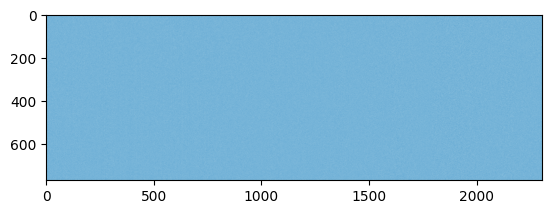

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.h.9.attn.c_attn.weight"], cmap="Blues")

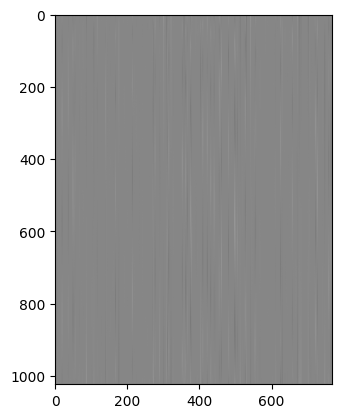

In [7]:
plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

this code below is visualizing the positional encoding for the gpt2 model.

- The curves show how specific embedding dimensions change as the token position increases.
- This can give insight into how the model represents position information in the embeddings.
- Typically, positional embeddings have smooth variations, resembling sinusoidal patterns, helping the model differentiate token positions.



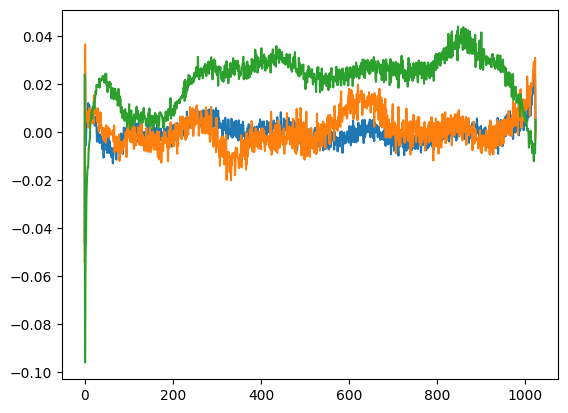

In [14]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 250])

how you would normally use a library from Hugging Face to load a model and use it to generate sentences.

In [17]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=25, num_return_sequences=2)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, so you can't define something in any other language. Let me introduce another topic:"},
 {'generated_text': "Hello, I'm a language model, I like this architecture so much. It has lots of code, and I love it"}]

# From scratch part



In [21]:
# %%capture
# !pip install hellaswag

In [22]:
import os
import math
import time
import inspect
from dataclasses import dataclass


import torch
import torch.nn as nn
from torch.nn import functional as F

so here we will code the class that will implement GPT2 main components.

some resources to check out


causal self attention class:
- computer Q,K,V
- applies attention
- projects the outputs


In [24]:
class CausalSelfAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd)
        self.c_proj = nn.Linear(config.n_embd, config.n_embd)
        self.n_head = config.n_head
        self.n_embd = config.n_embd

    def forward(self, x):
        B, T, C = x.size()
        qkv = self.c_attn(x)
        q, k, v = qkv.split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)
        y = F.scaled_dot_product_attention(q, k, v, is_causal=True)
        y = y.transpose(1, 2).contiguous().view(B, T, C)
        y = self.c_proj(y)
        return y

In [25]:
class Config:
    n_embd = 8
    n_head = 2

config = Config()
attention_layer = CausalSelfAttention(config)

# Example input: batch size = 1, sequence length = 4, embedding dim = 8
x = torch.rand(1, 4, 8)

In [31]:
attention_layer

CausalSelfAttention(
  (c_attn): Linear(in_features=8, out_features=24, bias=True)
  (c_proj): Linear(in_features=8, out_features=8, bias=True)
)

In [32]:
B, T, C = x.size()
B , T , C

(1, 4, 8)

In [35]:
qkv = attention_layer.c_attn(x)
qkv.shape


torch.Size([1, 4, 24])

In [41]:
q, k, v = qkv.split(8, dim=2)
q.shape, k.shape, v.shape


(torch.Size([1, 4, 8]), torch.Size([1, 4, 8]), torch.Size([1, 4, 8]))

In [42]:
k = k.view(1, 4, 2, 4).transpose(1, 2)
q = q.view(1, 4, 2, 4).transpose(1, 2)
v = v.view(1, 4, 2, 4).transpose(1, 2)
k.shape, q.shape, v.shape

(torch.Size([1, 2, 4, 4]), torch.Size([1, 2, 4, 4]), torch.Size([1, 2, 4, 4]))

In [43]:
y = F.scaled_dot_product_attention(q, k, v, is_causal=True)
print(y.shape)
y = y.transpose(1, 2).contiguous().view(B, T, C)
print(y.shape)

torch.Size([1, 2, 4, 4])
torch.Size([1, 4, 8])


In [44]:
y = attention_layer.c_proj(y)
y.shape

torch.Size([1, 4, 8])